<a href="https://colab.research.google.com/github/lreinosoh/lr/blob/main/Anexo_E_SVM_Proyecto_Grado_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

datos['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)
datos['CALIFICACIÓN'].fillna('NS', inplace=True)
datos['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)


In [ ]:
datos1.shape

(8824, 15)

PREDICCIONES POR CURSO
SEÑALES Y COMUNICACIONES

In [ ]:
SC = datos1[(datos1['CÓDIGO'] == 43390855) & (datos1['PERIODO'] != '2023-02')]
SC.shape

(239, 15)

In [ ]:
SC.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     17
NOTA DEFINITIVA PREREQUISITO 2    239
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  6
PROMEDIO PARCIAL                    0
DEFINITIVA                          9
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 13
PROMEDIO ACUMULADO                 13
dtype: int64

In [ ]:
SC = SC.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1', 'PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE'])

SC.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1      0
NOTA DEFINITIVA PREREQUISITO 2    205
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  0
PROMEDIO PARCIAL                    0
DEFINITIVA                          3
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                  0
PROMEDIO ACUMULADO                  0
dtype: int64

In [ ]:
SC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1094 to 6718
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       205 non-null    object 
 1   PERIODO                         205 non-null    object 
 2   CARRERA                         205 non-null    object 
 3   CÓDIGO                          205 non-null    int64  
 4   ASIGNATURA                      205 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  205 non-null    float64
 6   NOTA DEFINITIVA PREREQUISITO 2  0 non-null      float64
 7   DOCUMENTO ESTUDIANTE            205 non-null    int64  
 8   NOTAS PRIMER CORTE              205 non-null    float64
 9   PROMEDIO PARCIAL                205 non-null    float64
 10  DEFINITIVA                      202 non-null    float64
 11  CALIFICACIÓN                    205 non-null    int64  
 12  ASIGNATURA ANULADA              205 n

In [ ]:
X = SC[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = SC['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.975609756097561
Precision score:  0.975609756097561
Recall score:  1.0
F1 score:  0.9876543209876543


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 0  1]
 [ 0 40]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.98      1.00      0.99        40

    accuracy                           0.98        41
   macro avg       0.49      0.50      0.49        41
weighted avg       0.95      0.98      0.96        41



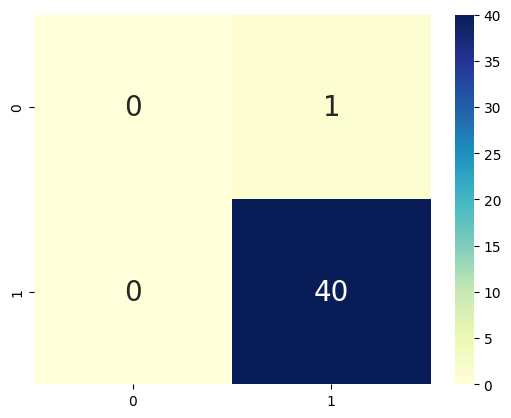

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

Validación Cruzada

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[1.         0.97560976 1.         0.97560976 0.92682927]


0.975609756097561

Busqueda en grilla para tuneo de hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
#k_range = list(range(1, 31))
grid_params = {'C': [0.1, 1, 10, 100],
               'gamma': [1, 0.1, 0.01, 0.001],
               'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

gs = GridSearchCV(SVC(),
                  grid_params,
                  cv = 6,
                  verbose = 3)
# fit the model on our train set
g_res = gs.fit(X_train,y_train)

Fitting 6 folds for each of 64 candidates, totalling 384 fits
[CV 1/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 2/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.964 total time=   0.0s
[CV 3/6] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/6] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 6/6] END ........C=0.1, gamma=1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 1/6] END .....C=0.1, gamma=1, kernel=linear;, score=0.964 total time=   0.0s
[CV 2/6] END .....C=0.1, gamma=1, kernel=linear;, score=0.964 total time=   0.0s
[CV 3/6] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/6] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/6] END .....C=0.1, gamma=1, kernel=linear;, score=0.963 total time=   0.0s
[CV 6/6] END .....C=0.1, gamma=1, kernel=linear

In [ ]:
# find the best score
print("Best Score: ",g_res.best_score_)

Best Score:  0.9819223985890653


In [ ]:
# get the hyperparameters with the best score
print("Best Hyperparameters", g_res.best_params_)

Best Hyperparameters {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


Nuevos datos

In [ ]:
SC1 = datos1[(datos1['CÓDIGO'] == 43390855) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
SC1 = SC1.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
#SC1 = SC1.dropna()


X_nuevos = SC1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoSC1 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoSC1)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        40
1  No Aprobado         3


MAT ESP

In [ ]:
MESP= datos [(datos ['CÓDIGO'] == 45190010) & (datos ['PERIODO'] != '2023-02')]

In [ ]:
#IA = IA.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
MESP = MESP.dropna(subset=['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE'])
#IA.dropna()

In [ ]:
X = MESP[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE']]
y = MESP['CALIFICACIÓN']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , test_size = 0.2)
svm_c = SVC(C = 100, gamma = 1, kernel = 'rbf')
svm_c.fit(X_train, y_train)
y_pred_SVM = svm_c.predict(X_test)

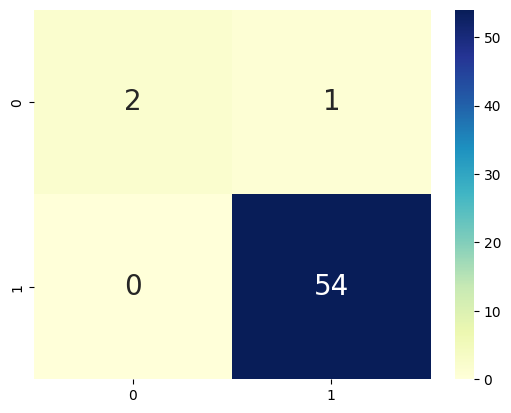

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.87719298 0.98245614 0.96428571 0.92857143 0.875     ]


0.925501253132832

In [ ]:
MESP1 = datos[(datos['CÓDIGO'] == 45190010) & (datos['PERIODO'] == '2023-02')]

In [ ]:
#IA = IA.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
MESP1 = MESP1.dropna(subset=['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE'])
#IA.dropna()

In [ ]:
X = MESP1[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE']]
y = MESP1['CALIFICACIÓN']

X_nuevos = MESP1[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})
print(tabla_conteo)

Predicciones para nuevos datos:
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        55
1  No Aprobado         3


INTELIGENCIA ARTIFICIAL

In [ ]:
IA = datos1[(datos1['CÓDIGO'] == 40050168) & (datos1['PERIODO'] != '2023-02')]
IA.shape

(540, 15)

In [ ]:
IA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 5986
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       540 non-null    object 
 1   PERIODO                         540 non-null    object 
 2   CARRERA                         540 non-null    object 
 3   CÓDIGO                          540 non-null    int64  
 4   ASIGNATURA                      540 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  353 non-null    float64
 6   NOTA DEFINITIVA PREREQUISITO 2  444 non-null    float64
 7   DOCUMENTO ESTUDIANTE            540 non-null    int64  
 8   NOTAS PRIMER CORTE              537 non-null    float64
 9   PROMEDIO PARCIAL                540 non-null    float64
 10  DEFINITIVA                      524 non-null    float64
 11  CALIFICACIÓN                    540 non-null    int64  
 12  ASIGNATURA ANULADA              540 non-

In [ ]:
IA.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1    187
NOTA DEFINITIVA PREREQUISITO 2     96
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  3
PROMEDIO PARCIAL                    0
DEFINITIVA                         16
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                110
PROMEDIO ACUMULADO                110
dtype: int64

In [ ]:
#IA = IA.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
IA = IA.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2', 'NOTAS PRIMER CORTE'])
#IA.dropna()

In [ ]:
IA.shape

(276, 15)

In [ ]:
IA.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
NOTA DEFINITIVA PREREQUISITO 2    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
DEFINITIVA                        9
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
dtype: int64

In [ ]:
X = IA[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = IA['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.8214285714285714
Precision score:  0.851063829787234
Recall score:  0.9302325581395349
F1 score:  0.888888888888889


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 6  7]
 [ 3 40]]


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.85      0.93      0.89        43

    accuracy                           0.82        56
   macro avg       0.76      0.70      0.72        56
weighted avg       0.81      0.82      0.81        56



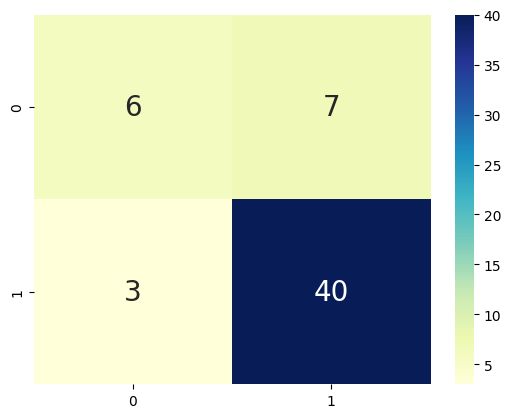

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.73214286 0.83636364 0.89090909 0.85454545 0.90909091]


0.8446103896103896

NUEVOS DATOS

In [ ]:
IA1 = datos1[(datos1['CÓDIGO'] == 40050168) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
IA1.shape

(44, 15)

In [ ]:
IA1.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    7
NOTA DEFINITIVA PREREQUISITO 2    1
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                2
PROMEDIO PARCIAL                  0
DEFINITIVA                        3
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
dtype: int64

In [ ]:
IA1 = IA1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2', 'NOTAS PRIMER CORTE', 'PROMEDIO ACUMULADO'])

In [ ]:
IA1.isnull().sum()

PLAN 4064                         0
PERIODO                           0
CARRERA                           0
CÓDIGO                            0
ASIGNATURA                        0
NOTA DEFINITIVA PREREQUISITO 1    0
NOTA DEFINITIVA PREREQUISITO 2    0
DOCUMENTO ESTUDIANTE              0
NOTAS PRIMER CORTE                0
PROMEDIO PARCIAL                  0
DEFINITIVA                        1
CALIFICACIÓN                      0
ASIGNATURA ANULADA                0
PROMEDIO SEMESTRAL                0
PROMEDIO ACUMULADO                0
dtype: int64

In [ ]:
#IA1 = IA1.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
#IA1 = IA1.dropna('NOTA DEFINITIVA PREREQUISITO 2')


X_nuevos = IA1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)


Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1]
     Resultado  Cantidad
0     Aprobado        31
1  No Aprobado         4


CIBERSEGURIDAD

In [ ]:
CS = datos1[(datos1['CÓDIGO'] == 43390863) & (datos1['PERIODO'] != '2023-02')]
CS.shape

(100, 15)

In [ ]:
CS.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     13
NOTA DEFINITIVA PREREQUISITO 2    100
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  1
PROMEDIO PARCIAL                    0
DEFINITIVA                          1
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 12
PROMEDIO ACUMULADO                 12
dtype: int64

In [ ]:
#IA = IA.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
CS = CS.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTAS PRIMER CORTE'])
#IA.dropna()

In [ ]:
CS.shape

(76, 15)

In [ ]:
X = CS[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = CS['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



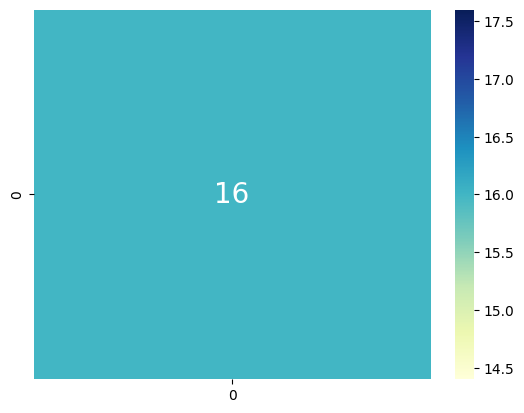

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[nan  1.  1.  1.  1.]


nan

NUEVOS DATOS

In [ ]:
CS1 = datos1[(datos1['CÓDIGO'] == 43390863) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
CS1.shape

(36, 15)

In [ ]:
CS1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     7
NOTA DEFINITIVA PREREQUISITO 2    36
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
CS1 = CS1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1'])

In [ ]:
CS1.shape

(29, 15)

In [ ]:
X_nuevos = CS1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        29
1  No Aprobado         0


GESTION DE TECNOLOGIA DE LA INFORMACION

In [ ]:
GTI = datos1[(datos1['CÓDIGO'] == 43390864) & (datos1['PERIODO'] != '2023-02')]
GTI.shape

(74, 15)

In [ ]:
GTI.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    10
NOTA DEFINITIVA PREREQUISITO 2    74
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
dtype: int64

In [ ]:
GTI = GTI.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTAS PRIMER CORTE'])
GTI.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     0
NOTA DEFINITIVA PREREQUISITO 2    56
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
X = GTI[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = GTI['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



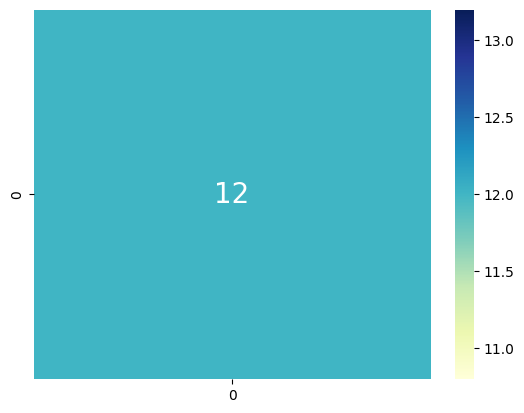

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.91666667 1.         1.         1.         0.90909091]


0.9651515151515151

NUEVOS DATOS

In [ ]:
GTI1 = datos1[(datos1['CÓDIGO'] == 43390864) & (datos1['PERIODO'] == '2023-02')]
GTI1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    12
NOTA DEFINITIVA PREREQUISITO 2    52
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
GTI1 = GTI1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1', 'NOTAS PRIMER CORTE'])

In [ ]:
GTI1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     0
NOTA DEFINITIVA PREREQUISITO 2    39
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
X_nuevos = GTI1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
     Resultado  Cantidad
0     Aprobado        39
1  No Aprobado         0


DATA ANALITYCS

In [ ]:
DA = datos1[(datos1['CÓDIGO'] == 43390860) & (datos1['PERIODO'] != '2023-02')]
DA.shape

(105, 15)

In [ ]:
DA.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     27
NOTA DEFINITIVA PREREQUISITO 2    105
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  0
PROMEDIO PARCIAL                    0
DEFINITIVA                          0
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 13
PROMEDIO ACUMULADO                 13
dtype: int64

In [ ]:
DA = DA.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1'])

In [ ]:
DA.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     0
NOTA DEFINITIVA PREREQUISITO 2    69
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
X = DA[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = DA['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.9285714285714286
Precision score:  0.9285714285714286
Recall score:  1.0
F1 score:  0.962962962962963


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      1.00      0.96        13

    accuracy                           0.93        14
   macro avg       0.46      0.50      0.48        14
weighted avg       0.86      0.93      0.89        14



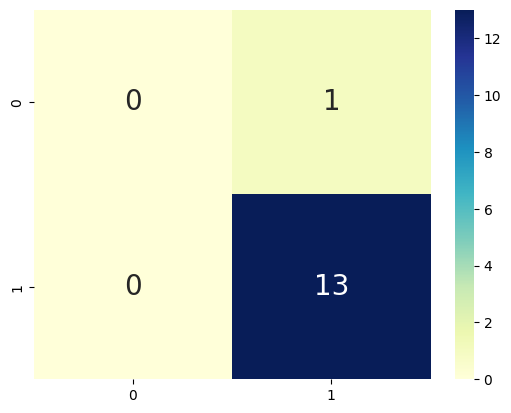

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")


In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[1.         1.         1.         0.92857143 0.84615385]


0.9549450549450549

NUEVOS DATOS

In [ ]:
DA1 = datos1[(datos1['CÓDIGO'] == 43390860) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
DA1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     1
NOTA DEFINITIVA PREREQUISITO 2    42
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
DA1 = DA1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1'])

In [ ]:
X_nuevos = DA1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        40
1  No Aprobado         1


SISTEMAS DISTRIBUIDOS

In [ ]:
SD = datos1[(datos1['CÓDIGO'] == 43390862) & (datos1['PERIODO'] != '2023-02')]
SD.shape

(133, 15)

In [ ]:
SD.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     22
NOTA DEFINITIVA PREREQUISITO 2    133
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  0
PROMEDIO PARCIAL                    0
DEFINITIVA                          1
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 11
PROMEDIO ACUMULADO                 11
dtype: int64

In [ ]:
#IA = IA.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
SD = SD.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1'])
#IA.dropna()

In [ ]:
SD.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1      0
NOTA DEFINITIVA PREREQUISITO 2    100
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  0
PROMEDIO PARCIAL                    0
DEFINITIVA                          0
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                  0
PROMEDIO ACUMULADO                  0
dtype: int64

In [ ]:
X = SD[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = SD['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        20

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



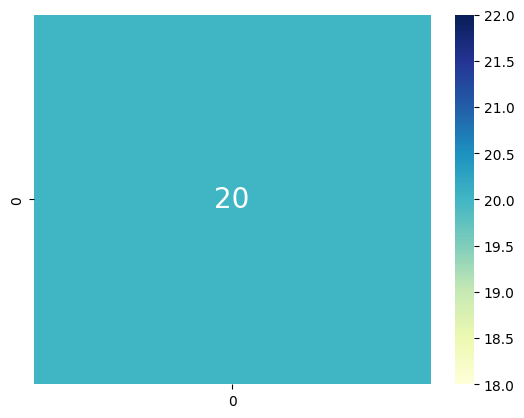

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[nan  1.  1.  1.  1.]


nan

NUEVOS DATOS

In [ ]:
SD1 = datos1[(datos1['CÓDIGO'] == 43390862) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
SD1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     4
NOTA DEFINITIVA PREREQUISITO 2    25
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         2
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
SD1 = SD1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1'])

In [ ]:
SD1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     0
NOTA DEFINITIVA PREREQUISITO 2    21
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
X_nuevos = SD1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        21
1  No Aprobado         0


PRACTICA DE INGENIERIA V

In [ ]:
PI_V = datos1[(datos1['CÓDIGO'] == 43390865) & (datos1['PERIODO'] != '2023-02')]
PI_V.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
2857,SI,2021-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,5.00,NaN,1018499078,NaN,0.0,4.1,1,N,4.70,3.76
2858,SI,2021-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,5.00,NaN,1026303497,NaN,0.0,4.1,1,N,4.25,3.67
2859,SI,2021-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.90,NaN,1015470534,NaN,0.0,4.0,1,N,4.05,3.90
2860,SI,2021-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.34,NaN,1013671685,NaN,0.0,4.0,1,N,3.78,3.75
2861,SI,2021-01,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.34,NaN,1016091590,NaN,0.0,4.0,1,N,3.99,3.70


In [ ]:
PI_V['CALIFICACIÓN'].value_counts()

CALIFICACIÓN
1    82
0     1
Name: count, dtype: int64

In [ ]:
PI_V.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     2
NOTA DEFINITIVA PREREQUISITO 2    83
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                82
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
dtype: int64

In [ ]:
PI_V = PI_V.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
PI_V = PI_V.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','PROMEDIO SEMESTRAL'])

In [ ]:
PI_V.shape

(69, 14)

In [ ]:
PI_V.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     0
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                68
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
X = PI_V[['PROMEDIO ACUMULADO', 'NOTA DEFINITIVA PREREQUISITO 1','PROMEDIO SEMESTRAL']]
y = PI_V['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  1.0
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



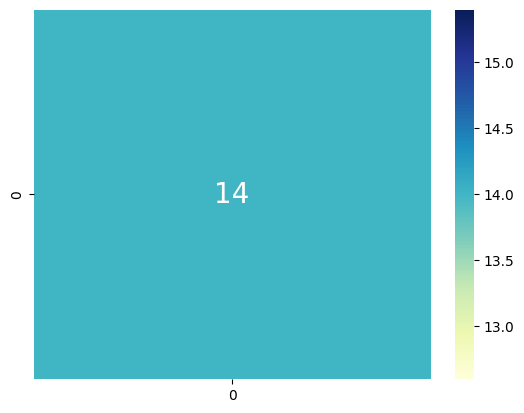

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[ 1.  1.  1. nan  1.]


nan

NUEVOS DATOS

In [ ]:
PI_V1 = datos1[(datos1['CÓDIGO'] == 43390865) & (datos1['PERIODO'] == '2023-02')];PI_V1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
8556,SI,2023-02,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.6,NaN,53032914,NaN,0.0,4.1,1,N,4.12,3.53
8557,SI,2023-02,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,5.0,NaN,1014289620,NaN,0.0,4.1,1,N,4.01,3.80
8558,SI,2023-02,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.6,NaN,1023958180,NaN,0.0,4.3,1,N,4.00,3.77
8559,SI,2023-02,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.2,NaN,1013661315,NaN,0.0,3.8,1,N,3.64,3.43
8560,SI,2023-02,INGENIERÍA DE SISTEMAS,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,4.2,NaN,1022447204,NaN,0.0,3.8,1,N,3.64,3.61


In [ ]:
PI_V1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     0
NOTA DEFINITIVA PREREQUISITO 2    44
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                44
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
X_nuevos = PI_V1[['PROMEDIO ACUMULADO', 'NOTA DEFINITIVA PREREQUISITO 1','PROMEDIO SEMESTRAL']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        44
1  No Aprobado         0


ARQUITECTURA DE SISTEMAS II

In [ ]:
AS_II = datos1[(datos1['CÓDIGO'] == 43390859) & (datos1['PERIODO'] != '2023-02')]
AS_II.shape

(115, 15)

In [ ]:
AS_II.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1      9
NOTA DEFINITIVA PREREQUISITO 2    115
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  1
PROMEDIO PARCIAL                    0
DEFINITIVA                          4
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 12
PROMEDIO ACUMULADO                 12
dtype: int64

In [ ]:
AS_II = AS_II.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
AS_II = AS_II.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTAS PRIMER CORTE'])


In [ ]:
X = AS_II[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = AS_II['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.9473684210526315
Precision score:  0.9473684210526315
Recall score:  1.0
F1 score:  0.972972972972973


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      1.00      0.97        18

    accuracy                           0.95        19
   macro avg       0.47      0.50      0.49        19
weighted avg       0.90      0.95      0.92        19



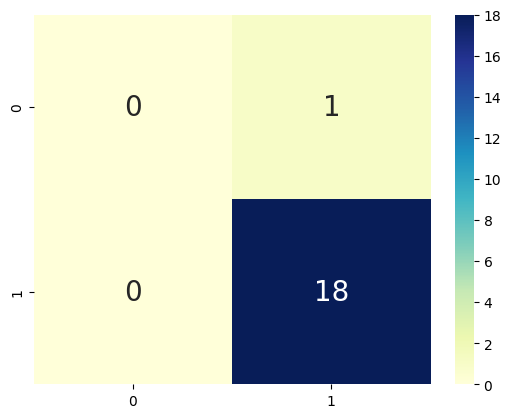

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.94736842 1.         0.94736842 1.         0.94444444]


0.9678362573099415

NUEVOS DATOS

In [ ]:
AS_II1 = datos1[(datos1['CÓDIGO'] == 43390859) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
AS_II1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     2
NOTA DEFINITIVA PREREQUISITO 2    48
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 0
PROMEDIO PARCIAL                   0
DEFINITIVA                         0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
AS_II1 = AS_II1.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
AS_II1 = AS_II1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1'])

In [ ]:
X_nuevos = AS_II1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        46
1  No Aprobado         0


REDES DE COMPUTADORES

In [ ]:
RC = datos1[(datos1['CÓDIGO'] == 43390858) & (datos1['PERIODO'] != '2023-02')]
RC.shape

(173, 15)

In [ ]:
RC.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1      0
NOTA DEFINITIVA PREREQUISITO 2    173
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  1
PROMEDIO PARCIAL                    0
DEFINITIVA                          1
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 13
PROMEDIO ACUMULADO                 13
dtype: int64

In [ ]:
RC = RC.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
RC = RC.dropna(subset=['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE'])
#IA.dropna()

In [ ]:
X = RC[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = RC['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.96875
Precision score:  0.96875
Recall score:  1.0
F1 score:  0.9841269841269841


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.98        31

    accuracy                           0.97        32
   macro avg       0.48      0.50      0.49        32
weighted avg       0.94      0.97      0.95        32



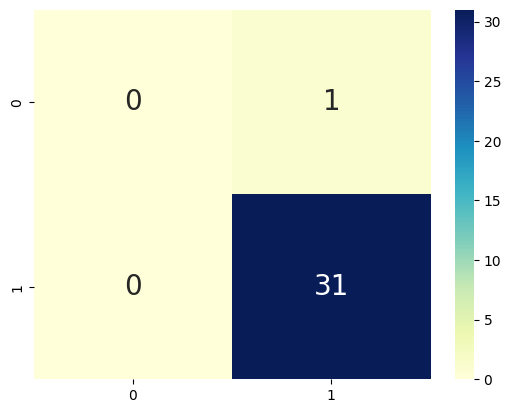

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[1.         1.         0.96875    0.90625    0.93548387]


0.9620967741935484

NUEVOS DATOS

In [ ]:
RC1 = datos1[(datos1['CÓDIGO'] == 43390858) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
RC1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     1
NOTA DEFINITIVA PREREQUISITO 2    33
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 1
PROMEDIO PARCIAL                   0
DEFINITIVA                         1
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
RC1 = RC1.drop('NOTA DEFINITIVA PREREQUISITO 2', axis=1)
RC1 = RC1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1','NOTAS PRIMER CORTE'])

In [ ]:
X_nuevos = RC1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        31
1  No Aprobado         0


ARQUITECTURA DE SISTEMAS 1

In [ ]:
AS_I = datos1[(datos1['CÓDIGO'] == 43390856) & (datos1['PERIODO'] != '2023-02')]
AS_I.shape

(205, 15)

In [ ]:
AS_I.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     12
NOTA DEFINITIVA PREREQUISITO 2    205
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                  2
PROMEDIO PARCIAL                    0
DEFINITIVA                         11
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 15
PROMEDIO ACUMULADO                 15
dtype: int64

In [ ]:
AS_I = AS_I.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
AS_I = AS_I.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1', 'NOTAS PRIMER CORTE'])

In [ ]:
X = AS_I[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = AS_I['CALIFICACIÓN']

In [ ]:
#División del conjunto de datos
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.8611111111111112
Precision score:  0.9565217391304348
Recall score:  0.8461538461538461
F1 score:  0.8979591836734695


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.85      0.90        26

    accuracy                           0.86        36
   macro avg       0.82      0.87      0.84        36
weighted avg       0.88      0.86      0.87        36



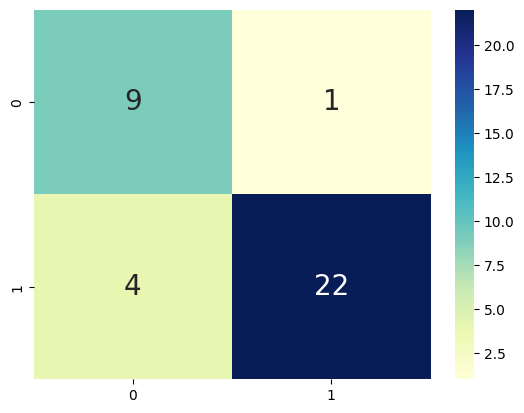

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.86111111 0.66666667 0.63888889 0.91428571 1.        ]


0.8161904761904761

NUEVOS DATOS

In [ ]:
AS_I1 = datos1[(datos1['CÓDIGO'] == 43390856) & (datos1['PERIODO'] == '2023-02')]

In [ ]:
AS_I1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     3
NOTA DEFINITIVA PREREQUISITO 2    47
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 3
PROMEDIO PARCIAL                   0
DEFINITIVA                         3
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
AS_I1 = AS_I1.drop('NOTA DEFINITIVA PREREQUISITO 2', axis=1)
AS_I1 = AS_I1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1','NOTAS PRIMER CORTE'])

In [ ]:
X_nuevos = AS_I1[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        35
1  No Aprobado         6


practica de ingenieria IV

In [ ]:
PI_IV = datos1[(datos1['CÓDIGO'] == 43390861) & (datos1['PERIODO'] != '2023-02')]
PI_IV.shape

(146, 15)

In [ ]:
PI_IV.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1      2
NOTA DEFINITIVA PREREQUISITO 2    146
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                143
PROMEDIO PARCIAL                    0
DEFINITIVA                         11
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 13
PROMEDIO ACUMULADO                 13
dtype: int64

In [ ]:
PI_IV = PI_IV.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
PI_IV = PI_IV.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','PROMEDIO SEMESTRAL'])

In [ ]:
X = PI_IV[['PROMEDIO ACUMULADO', 'PROMEDIO SEMESTRAL','NOTA DEFINITIVA PREREQUISITO 1']]
y = PI_IV['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.8518518518518519
Precision score:  0.8518518518518519
Recall score:  1.0
F1 score:  0.92


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.85      1.00      0.92        23

    accuracy                           0.85        27
   macro avg       0.43      0.50      0.46        27
weighted avg       0.73      0.85      0.78        27



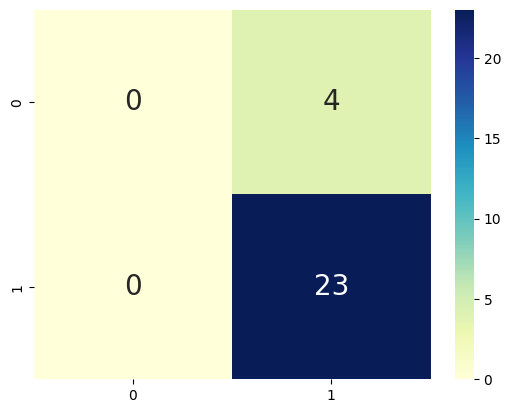

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.77777778 0.80769231 0.96153846 0.92307692 0.96153846]


0.8863247863247864

NUEVOS DATOS

In [ ]:
PI_IV1 = datos1[(datos1['CÓDIGO'] == 43390861) & (datos1['PERIODO'] == '2023-02')]
PI_IV1.shape

(50, 15)

In [ ]:
PI_IV1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     1
NOTA DEFINITIVA PREREQUISITO 2    50
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                50
PROMEDIO PARCIAL                   0
DEFINITIVA                         6
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
PI_IV1 = PI_IV1.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
PI_IV1 = PI_IV1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1'])

In [ ]:
X_nuevos = PI_IV1[['PROMEDIO ACUMULADO', 'PROMEDIO SEMESTRAL','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        49
1  No Aprobado         0


PRACVTICA DE INGENIERIA III

In [ ]:
PI_III = datos1[(datos1['CÓDIGO'] == 43390857) & (datos1['PERIODO'] != '2023-02')]
PI_III.shape

(202, 15)

In [ ]:
PI_III.isnull().sum()

PLAN 4064                           0
PERIODO                             0
CARRERA                             0
CÓDIGO                              0
ASIGNATURA                          0
NOTA DEFINITIVA PREREQUISITO 1     12
NOTA DEFINITIVA PREREQUISITO 2     16
DOCUMENTO ESTUDIANTE                0
NOTAS PRIMER CORTE                197
PROMEDIO PARCIAL                    0
DEFINITIVA                          9
CALIFICACIÓN                        0
ASIGNATURA ANULADA                  0
PROMEDIO SEMESTRAL                 13
PROMEDIO ACUMULADO                 13
dtype: int64

In [ ]:
#PI_III = PI_III.drop('NOTA DEFINITIVA PREREQUISITO 2', axis = 1)
PI_III = PI_III.dropna(subset=['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2', 'PROMEDIO SEMESTRAL'])

In [ ]:
X = PI_III[['PROMEDIO ACUMULADO', 'PROMEDIO SEMESTRAL','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]
y = PI_III['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
print('Accuracy score: ', format(accuracy_score(y_test, y_pred_SVM)))
print('Precision score: ', format(precision_score(y_test, y_pred_SVM)))
print('Recall score: ', format(recall_score(y_test, y_pred_SVM)))
print('F1 score: ', format(f1_score(y_test, y_pred_SVM)))

Accuracy score:  0.8857142857142857
Precision score:  0.9117647058823529
Recall score:  0.96875
F1 score:  0.9393939393939394


In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))


Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.91      0.97      0.94        32

    accuracy                           0.89        35
   macro avg       0.46      0.48      0.47        35
weighted avg       0.83      0.89      0.86        35



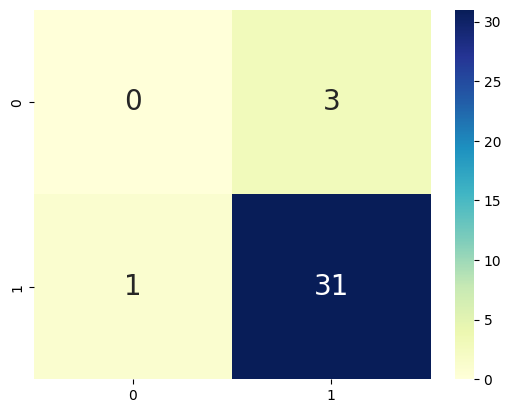

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.88571429 0.94285714 0.91176471 0.94117647 0.97058824]


0.9304201680672269

nuevos datos

In [ ]:
PI_III1 = datos1[(datos1['CÓDIGO'] == 43390857) & (datos1['PERIODO'] == '2023-02')]
PI_III1.shape

(44, 15)

In [ ]:
PI_III1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     1
NOTA DEFINITIVA PREREQUISITO 2     3
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                44
PROMEDIO PARCIAL                   0
DEFINITIVA                         6
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
PI_III1 = PI_III1.dropna(subset=['NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2'])

In [ ]:
X_nuevos = PI_III1[['PROMEDIO ACUMULADO', 'PROMEDIO SEMESTRAL','NOTA DEFINITIVA PREREQUISITO 1', 'NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteo = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteo)



Predicciones para nuevos datos:
 [0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        39
1  No Aprobado         2


In [ ]:
resultados_svm = pd.DataFrame({'Real':[36,30,42,37,80,61,35,42,108,90,86,62,69,94,33,42,31,90,82,55,71,56,112,107
], 'Pred': [21,21,35,31,75,58,32,40,108,90,87,64,74,100,40,49,39,100,106,81,151,149,207,208]}); resultados_svm

,Real,Pred
0,36,21
1,30,21
2,42,35
3,37,31
4,80,75
5,61,58
6,35,32
7,42,40
8,108,108
9,90,90


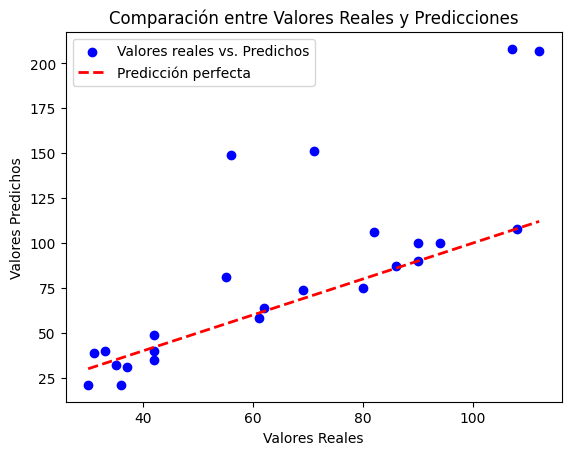

In [ ]:
# Supongamos que tienes los valores reales y predichos almacenados en las listas y_real y y_pred
y_real = [36,30,42,37,80,61,35,42,108,90,86,62,69,94,33,42,31,90,82,55,71,56,112,107]  # Ejemplo, reemplaza con tus datos reales
y_pred = [21,21,35,31,75,58,32,40,108,90,87,64,74,100,40,49,39,100,106,81,151,149,207,208]  # Ejemplo, reemplaza con tus datos predichos

# Crear un gráfico de dispersión
plt.scatter(y_real, y_pred, color='blue', marker='o', label='Valores reales vs. Predichos')

# Agregar una línea diagonal para visualizar la igualdad
plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle='--', color='red', linewidth=2, label='Predicción perfecta')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predicciones')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

##BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
AAL = datos2[(datos2['CÓDIGO'] == 43390852) & (datos2['PERIODO'] != '2023-02')]
AAL.shape

(232, 14)

In [ ]:
AAL.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    13
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 5
PROMEDIO PARCIAL                   0
DEFINITIVA                        10
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                14
PROMEDIO ACUMULADO                14
dtype: int64

In [ ]:
AAL= AAL.dropna()
AAL.shape

(198, 14)

In [ ]:
X = AAL[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = AAL['CALIFICACIÓN']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(198, 3) (198,)
(158, 3) (158,)
(40, 3) (40,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 1.00
Precision score: 1.00
Recall score: 1.00
F1 score: 1.00


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[40]]

Classification Report

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



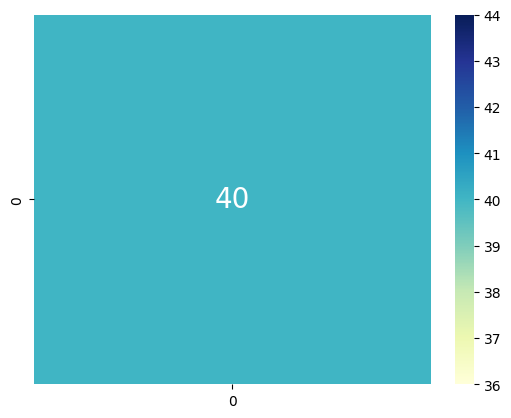

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)


In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.95       0.975      1.         0.97435897 0.97435897]


0.9747435897435898

##NUEVOS DATOS

In [ ]:
AAL2 = datos2[(datos2['CÓDIGO'] == 43390852) & (datos2['PERIODO'] == '2023-02')]

AAL2 = AAL2.dropna()

X_nuevos = AAL2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoAAL2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoAAL2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        50
1  No Aprobado         0


In [ ]:
AAL2.shape

(50, 14)

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
datos1.shape

(44575, 14)

##ARQUITECTURA DE COMPUTADORES



In [ ]:
APC = datos1[(datos1['CÓDIGO'] == 43390846) & (datos1['PERIODO'] != '2023-02')]
APC.shape

(390, 14)

In [ ]:
APC.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    43
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 4
PROMEDIO PARCIAL                   0
DEFINITIVA                         8
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 6
PROMEDIO ACUMULADO                 6
dtype: int64

In [ ]:
APC= APC.dropna()
APC.shape

(336, 14)

In [ ]:
APC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 368 to 6297
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       336 non-null    object 
 1   PERIODO                         336 non-null    object 
 2   CARRERA                         336 non-null    object 
 3   CÓDIGO                          336 non-null    int64  
 4   ASIGNATURA                      336 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  336 non-null    float64
 6   DOCUMENTO ESTUDIANTE            336 non-null    int64  
 7   NOTAS PRIMER CORTE              336 non-null    float64
 8   PROMEDIO PARCIAL                336 non-null    float64
 9   DEFINITIVA                      336 non-null    float64
 10  CALIFICACIÓN                    336 non-null    int64  
 11  ASIGNATURA ANULADA              336 non-null    object 
 12  PROMEDIO SEMESTRAL              336 no

In [ ]:
X = APC[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = APC['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(336, 3) (336,)
(268, 3) (268,)
(68, 3) (68,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.94
Precision score: 0.94
Recall score: 1.00
F1 score: 0.97


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 0  4]
 [ 0 64]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.94      1.00      0.97        64

    accuracy                           0.94        68
   macro avg       0.47      0.50      0.48        68
weighted avg       0.89      0.94      0.91        68



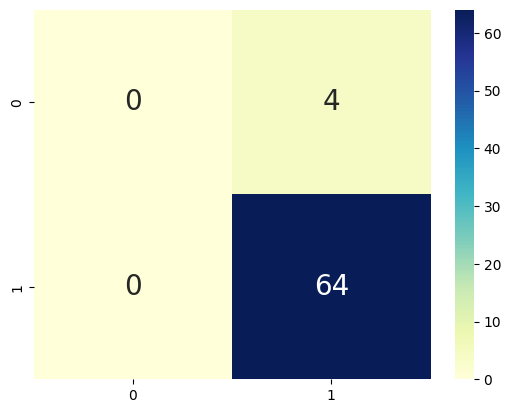

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:

from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.86764706 1.         0.95522388 0.97014925 0.95522388]


0.9496488147497806

Nuevos datos

In [ ]:
APC2 = datos1[(datos1['CÓDIGO'] == 43390846) & (datos1['PERIODO'] == '2023-02')]

APC2 = APC2.dropna()

X_nuevos = APC2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoAPC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoAPC2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        87
1  No Aprobado         0


In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,1,N,4.57,3.65


In [ ]:
datos1.shape

(44575, 13)

##MATEMATICAS DISCRETAS



In [ ]:
MD = datos1[(datos1['CÓDIGO'] == 43390845) & (datos1['PERIODO'] != '2023-02')]
MD.shape

(558, 13)

In [ ]:
MD.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    59
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                16
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
dtype: int64

In [ ]:
MD= MD.dropna()
MD.shape

(479, 13)

In [ ]:
MD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 25029 to 41841
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       479 non-null    object 
 1   PERIODO                         479 non-null    object 
 2   CARRERA                         479 non-null    object 
 3   CÓDIGO                          479 non-null    int64  
 4   ASIGNATURA                      479 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  479 non-null    float64
 6   DOCUMENTO ESTUDIANTE            479 non-null    int64  
 7   NOTAS PRIMER CORTE              479 non-null    float64
 8   PROMEDIO PARCIAL                479 non-null    float64
 9   CALIFICACIÓN                    479 non-null    int64  
 10  ASIGNATURA ANULADA              479 non-null    object 
 11  PROMEDIO SEMESTRAL              479 non-null    float64
 12  PROMEDIO ACUMULADO              479

In [ ]:
X = MD[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = MD['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(479, 3) (479,)
(383, 3) (383,)
(96, 3) (96,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.99
F1 score: 0.98


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 4  3]
 [ 1 88]]

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.97      0.99      0.98        89

    accuracy                           0.96        96
   macro avg       0.88      0.78      0.82        96
weighted avg       0.95      0.96      0.96        96



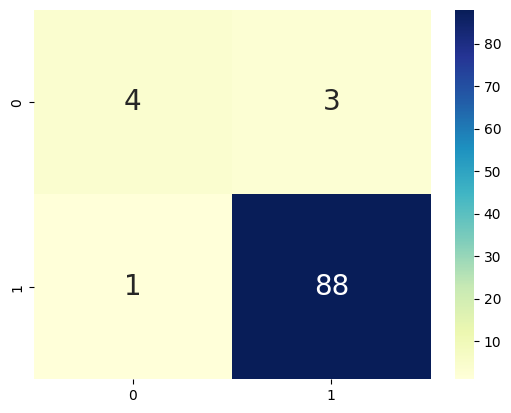

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

Nuevos datos

In [ ]:
MD2 = datos1[(datos1['CÓDIGO'] == 43390845) & (datos1['PERIODO'] == '2023-02')]

MD2 = MD2.dropna()

X_nuevos = MD2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoMD2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoMD2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        93
1  No Aprobado         1


##BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1032419347,4.4,4.20,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1030690955,4.0,4.25,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1010203985,4.0,4.00,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1019081611,4.0,4.10,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1014275874,4.5,4.75,1,N,4.57,3.65


In [ ]:
BD = datos2[(datos1['CÓDIGO'] == 43390847) & (datos2['PERIODO'] != '2023-02')]
BD.shape

(388, 14)

In [ ]:
BD.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    54
NOTA DEFINITIVA PREREQUISITO 2    10
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 5
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                18
PROMEDIO ACUMULADO                18
dtype: int64

In [ ]:
BD= BD.dropna()
BD.shape

(317, 14)

In [ ]:
X = BD[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = BD['CALIFICACIÓN']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(317, 4) (317,)
(253, 4) (253,)
(64, 4) (64,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.92
Precision score: 0.92
Recall score: 1.00
F1 score: 0.96


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 0  5]
 [ 0 59]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.92      1.00      0.96        59

    accuracy                           0.92        64
   macro avg       0.46      0.50      0.48        64
weighted avg       0.85      0.92      0.88        64



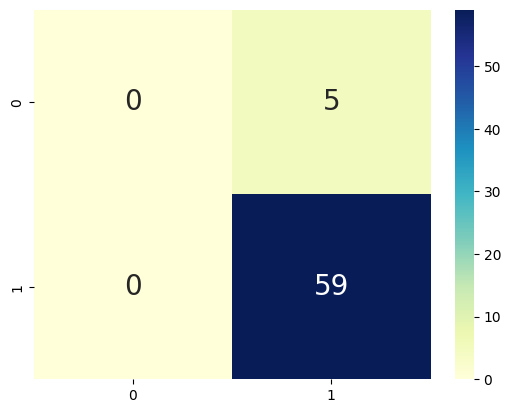

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.921875   0.9375     0.96825397 0.93650794 0.92063492]


0.9369543650793652

##NUEVOS DATOS

In [ ]:
BD2 = datos2[(datos2['CÓDIGO'] == 43390847) & (datos2['PERIODO'] == '2023-02')]

BD2 = BD2.dropna()

X_nuevos = BD2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoBD2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoBD2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]
     Resultado  Cantidad
0     Aprobado        75
1  No Aprobado         0


In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO','DEFINITIVA',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,1,N,4.57,3.65


In [ ]:
datos1.shape

(44575, 13)

##ESTRUCTURA DE DATOS

In [ ]:
ED = datos1[(datos1['CÓDIGO'] == 43390844) & (datos1['PERIODO'] != '2023-02')]
ED.shape

(524, 13)

In [ ]:
ED.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    46
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                13
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                11
PROMEDIO ACUMULADO                11
dtype: int64

In [ ]:
ED= ED.dropna()
ED.shape

(459, 13)

In [ ]:
ED.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 335 to 6227
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       459 non-null    object 
 1   PERIODO                         459 non-null    object 
 2   CARRERA                         459 non-null    object 
 3   CÓDIGO                          459 non-null    int64  
 4   ASIGNATURA                      459 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  459 non-null    float64
 6   DOCUMENTO ESTUDIANTE            459 non-null    int64  
 7   NOTAS PRIMER CORTE              459 non-null    float64
 8   PROMEDIO PARCIAL                459 non-null    float64
 9   CALIFICACIÓN                    459 non-null    int64  
 10  ASIGNATURA ANULADA              459 non-null    object 
 11  PROMEDIO SEMESTRAL              459 non-null    float64
 12  PROMEDIO ACUMULADO              459 no

In [ ]:
X = ED[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ED['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(459, 3) (459,)
(367, 3) (367,)
(92, 3) (92,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.91
Precision score: 0.96
Recall score: 0.94
F1 score: 0.95


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 7  3]
 [ 5 77]]

Classification Report

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.96      0.94      0.95        82

    accuracy                           0.91        92
   macro avg       0.77      0.82      0.79        92
weighted avg       0.92      0.91      0.92        92



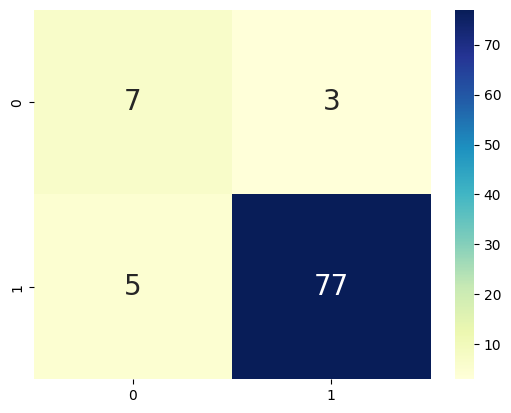

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.91304348 0.97826087 0.86956522 0.9673913  0.87912088]


0.9214763497372193

Nuevos datos

In [ ]:
ED2 = datos1[(datos1['CÓDIGO'] == 43390844) & (datos1['PERIODO'] == '2023-02')]

ED2 = ED2.dropna()

X_nuevos = ED2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoED2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoED2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0]
     Resultado  Cantidad
0     Aprobado       115
1  No Aprobado         8


In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

##BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,1,N,4.57,3.65


In [ ]:
EYL = datos2[(datos2['CÓDIGO'] == 43390849) & (datos2['PERIODO'] != '2023-02')]
EYL.shape

(294, 13)

In [ ]:
EYL.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     5
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 3
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
dtype: int64

In [ ]:
EYL= EYL.dropna()
EYL.shape

(274, 13)

In [ ]:
X = EYL[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = EYL['CALIFICACIÓN']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(274, 3) (274,)
(219, 3) (219,)
(55, 3) (55,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.95
Precision score: 0.95
Recall score: 1.00
F1 score: 0.97


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 0  3]
 [ 0 52]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.95      1.00      0.97        52

    accuracy                           0.95        55
   macro avg       0.47      0.50      0.49        55
weighted avg       0.89      0.95      0.92        55



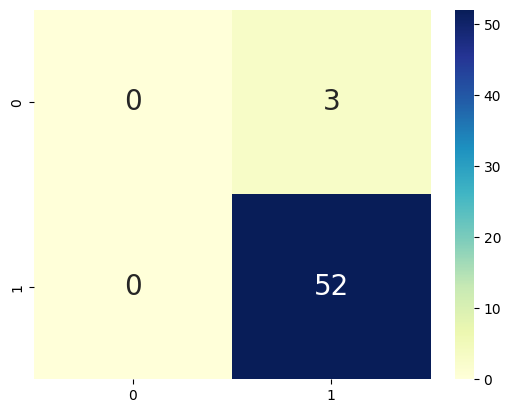

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.96363636 0.98181818 0.85454545 0.92727273 0.98148148]


0.9417508417508417

##NUEVOS DATOS

In [ ]:
EYL2 = datos2[(datos2['CÓDIGO'] == 43390849) & (datos2['PERIODO'] == '2023-02')]

EYL2 = EYL2.dropna()

X_nuevos = EYL2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoEYL2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoEYL2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        74
1  No Aprobado         0


In [ ]:
EYL2.shape

(74, 13)

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

##BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
IS1 = datos2[(datos2['CÓDIGO'] == 43390850) & (datos2['PERIODO'] != '2023-02')]
IS1.shape

(306, 14)

In [ ]:
IS1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    19
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                17
PROMEDIO PARCIAL                   0
DEFINITIVA                        25
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                18
PROMEDIO ACUMULADO                18
dtype: int64

In [ ]:
IS1= IS1.dropna()
IS1.shape

(251, 14)

In [ ]:
X = IS1[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = IS1['CALIFICACIÓN']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(251, 3) (251,)
(200, 3) (200,)
(51, 3) (51,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.94
Precision score: 0.94
Recall score: 1.00
F1 score: 0.97


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 0  3]
 [ 0 48]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.94      1.00      0.97        48

    accuracy                           0.94        51
   macro avg       0.47      0.50      0.48        51
weighted avg       0.89      0.94      0.91        51



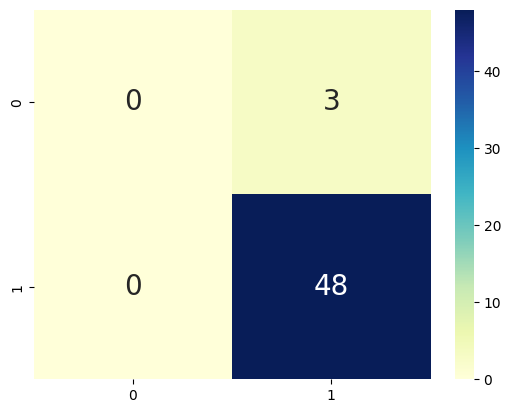

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.7254902 1.        0.96      0.98      0.94     ]


0.9210980392156862

##NUEVOS DATOS

In [ ]:
IS12 = datos2[(datos2['CÓDIGO'] == 43390850) & (datos2['PERIODO'] == '2023-02')]

IS12 = IS12.dropna()

X_nuevos = IS12[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoIS12 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoIS12)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        63
1  No Aprobado         0


In [ ]:
IS12.shape

(63, 14)

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

##BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
IS2 = datos2[(datos2['CÓDIGO'] == 43390853) & (datos2['PERIODO'] != '2023-02')]
IS2.shape

(226, 14)

In [ ]:
IS2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     7
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 4
PROMEDIO PARCIAL                   0
DEFINITIVA                         8
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                15
PROMEDIO ACUMULADO                15
dtype: int64

In [ ]:
IS2= IS2.dropna()
IS2.shape

(199, 14)

In [ ]:
X = IS2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = IS2['CALIFICACIÓN']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(199, 3) (199,)
(159, 3) (159,)
(40, 3) (40,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.97
Precision score: 0.97
Recall score: 1.00
F1 score: 0.99


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 0  1]
 [ 0 39]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.97      1.00      0.99        39

    accuracy                           0.97        40
   macro avg       0.49      0.50      0.49        40
weighted avg       0.95      0.97      0.96        40



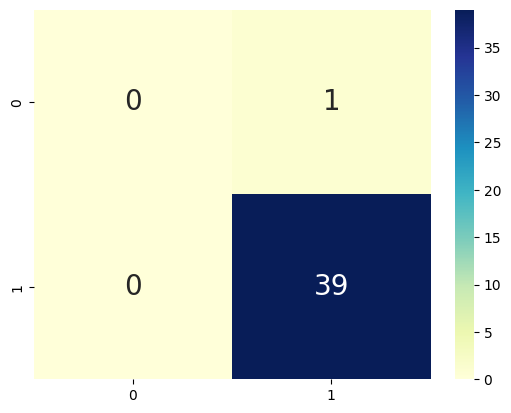

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.975      0.95       0.975      0.95       0.94871795]


0.9597435897435898

##NUEVOS DATOS

In [ ]:
IS22 = datos2[(datos2['CÓDIGO'] == 43390853) & (datos2['PERIODO'] == '2023-02')]

IS22 = IS22.dropna()

X_nuevos = IS22[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoIS22 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoIS22)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        34
1  No Aprobado         1


In [ ]:
IS22.shape

(35, 14)

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

##BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,1,N,4.57,3.65


In [ ]:
ITPC = datos2[(datos2['CÓDIGO'] == 43390848) & (datos2['PERIODO'] != '2023-02')]
ITPC.shape

(525, 13)

In [ ]:
ITPC.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    17
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                17
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                18
PROMEDIO ACUMULADO                18
dtype: int64

In [ ]:
ITPC= ITPC.dropna()
ITPC.shape

(476, 13)

In [ ]:
X = ITPC[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = ITPC['CALIFICACIÓN']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(476, 3) (476,)
(380, 3) (380,)
(96, 3) (96,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.86
Precision score: 0.88
Recall score: 0.96
F1 score: 0.92


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[10 10]
 [ 3 73]]

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.50      0.61        20
           1       0.88      0.96      0.92        76

    accuracy                           0.86        96
   macro avg       0.82      0.73      0.76        96
weighted avg       0.86      0.86      0.85        96



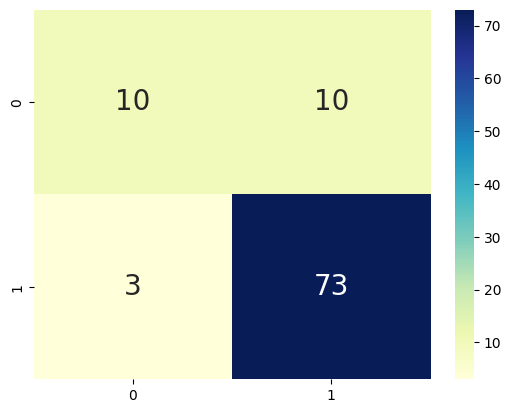

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.84375    0.86315789 0.70526316 0.86315789 0.95789474]


0.8466447368421053

##NUEVOS DATOS

In [ ]:
ITPC2 = datos2[(datos2['CÓDIGO'] == 43390848) & (datos2['PERIODO'] == '2023-02')]

ITPC2 = ITPC2.dropna()

X_nuevos = ITPC2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoITPC2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoITPC2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        90
1  No Aprobado         7


In [ ]:
ITPC2.shape

(97, 13)

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','DEFINITIVA',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,1,N,4.57,3.65


In [ ]:
datos1.shape

(44575, 13)

##MATEMÁTICAS DISCRETAS

---





In [ ]:
MD = datos1[(datos1['CÓDIGO'] == 43390845) & (datos1['PERIODO'] != '2023-02')]
MD.shape

(558, 13)

In [ ]:
MD

In [ ]:
MD.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    59
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                16
PROMEDIO PARCIAL                   0
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
dtype: int64

In [ ]:
MD= MD.dropna()
MD.shape

(479, 13)

In [ ]:
MD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 25029 to 41841
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       479 non-null    object 
 1   PERIODO                         479 non-null    object 
 2   CARRERA                         479 non-null    object 
 3   CÓDIGO                          479 non-null    int64  
 4   ASIGNATURA                      479 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  479 non-null    float64
 6   DOCUMENTO ESTUDIANTE            479 non-null    int64  
 7   NOTAS PRIMER CORTE              479 non-null    float64
 8   PROMEDIO PARCIAL                479 non-null    float64
 9   CALIFICACIÓN                    479 non-null    int64  
 10  ASIGNATURA ANULADA              479 non-null    object 
 11  PROMEDIO SEMESTRAL              479 non-null    float64
 12  PROMEDIO ACUMULADO              479

In [ ]:
X = MD[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = MD['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(479, 3) (479,)
(383, 3) (383,)
(96, 3) (96,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.96
Precision score: 0.97
Recall score: 0.99
F1 score: 0.98


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 4  3]
 [ 1 88]]

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.97      0.99      0.98        89

    accuracy                           0.96        96
   macro avg       0.88      0.78      0.82        96
weighted avg       0.95      0.96      0.96        96



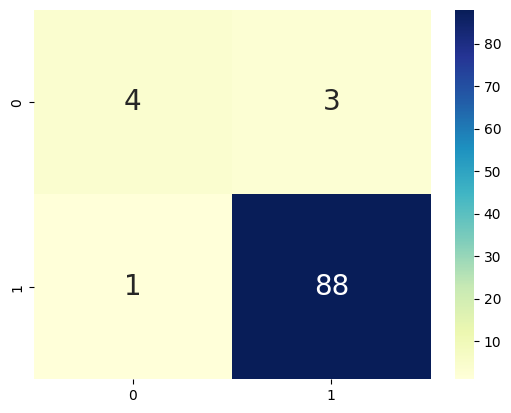

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

Nuevos datos

In [ ]:
MD2 = datos1[(datos1['CÓDIGO'] == 43390845) & (datos1['PERIODO'] == '2023-02')]

MD2 = MD2.dropna()

X_nuevos = MD2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoMD2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoMD2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        93
1  No Aprobado         1


In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
datos1.shape

(44575, 13)

##PENSAMIENTO SISTEMICO

In [ ]:
PS = datos1[(datos1['CÓDIGO'] == 43390796) & (datos1['PERIODO'] != '2023-02')]
PS.shape

(1073, 13)

In [ ]:
PS.isnull().sum()

PLAN 4064                0
PERIODO                  0
CARRERA                  0
CÓDIGO                   0
ASIGNATURA               0
DOCUMENTO ESTUDIANTE     0
NOTAS PRIMER CORTE      23
PROMEDIO PARCIAL         0
DEFINITIVA              79
CALIFICACIÓN             0
ASIGNATURA ANULADA       0
PROMEDIO SEMESTRAL      45
PROMEDIO ACUMULADO      45
dtype: int64

In [ ]:
PS= PS.dropna()
PS.shape

(983, 13)

In [ ]:
PS.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 20775 to 40717
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAN 4064             983 non-null    object 
 1   PERIODO               983 non-null    object 
 2   CARRERA               983 non-null    object 
 3   CÓDIGO                983 non-null    int64  
 4   ASIGNATURA            983 non-null    object 
 5   DOCUMENTO ESTUDIANTE  983 non-null    int64  
 6   NOTAS PRIMER CORTE    983 non-null    float64
 7   PROMEDIO PARCIAL      983 non-null    float64
 8   DEFINITIVA            983 non-null    float64
 9   CALIFICACIÓN          983 non-null    int64  
 10  ASIGNATURA ANULADA    983 non-null    object 
 11  PROMEDIO SEMESTRAL    983 non-null    float64
 12  PROMEDIO ACUMULADO    983 non-null    float64
dtypes: float64(5), int64(3), object(5)
memory usage: 107.5+ KB


In [ ]:
X = PS[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = PS['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(983, 2) (983,)
(786, 2) (786,)
(197, 2) (197,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.95
Precision score: 0.96
Recall score: 0.99
F1 score: 0.98


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[  8   8]
 [  1 180]]

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        16
           1       0.96      0.99      0.98       181

    accuracy                           0.95       197
   macro avg       0.92      0.75      0.81       197
weighted avg       0.95      0.95      0.95       197



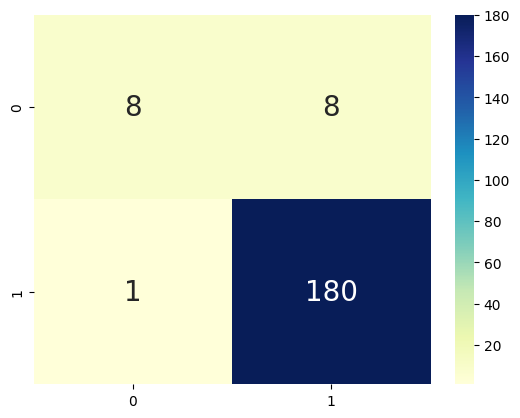

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

Nuevos datos

In [ ]:
PS2 = datos1[(datos1['CÓDIGO'] == 43390796) & (datos1['PERIODO'] == '2023-02')]

PS2 = PS2.dropna()

X_nuevos = PS2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPS2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPS2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        78
1  No Aprobado         2


##PRACTICA DE INGENIERÍA DE SISTEMAS 1

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO','NOTAS PRIMER CORTE',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1032419347,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1030690955,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1010203985,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1019081611,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1014275874,4.75,4.85,1,N,4.57,3.65


In [ ]:
PI1 = datos2[(datos1['CÓDIGO'] == 43390898) & (datos2['PERIODO'] != '2023-02')]
PI1.shape

(679, 14)

In [ ]:
PI1.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    50
NOTA DEFINITIVA PREREQUISITO 2    68
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
DEFINITIVA                        61
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 8
PROMEDIO ACUMULADO                 8
dtype: int64

In [ ]:
PI1= PI1.dropna()
PI1.shape

(553, 14)

In [ ]:
X = PI1[['PROMEDIO ACUMULADO', 'NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = PI1['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(553, 3) (553,)
(442, 3) (442,)
(111, 3) (111,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


Accuracy score: 0.98
Precision score: 0.98
Recall score: 1.00
F1 score: 0.99


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[  0   2]
 [  0 109]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.98      1.00      0.99       109

    accuracy                           0.98       111
   macro avg       0.49      0.50      0.50       111
weighted avg       0.96      0.98      0.97       111



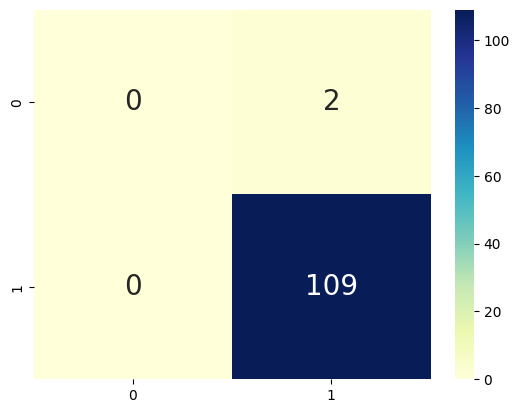

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.96396396 0.98198198 0.82882883 0.95454545 0.99090909]


0.944045864045864

Nuevos Datos

In [ ]:
PI12 = datos2[(datos2['CÓDIGO'] == 43390898) & (datos2['PERIODO'] == '2023-02')]
PI12.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1     5
NOTA DEFINITIVA PREREQUISITO 2     8
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
DEFINITIVA                        17
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                 0
PROMEDIO ACUMULADO                 0
dtype: int64

In [ ]:
PI12 = datos2[(datos2['CÓDIGO'] == 43390898) & (datos2['PERIODO'] == '2023-02')]

PI12 = PI12.dropna()

X_nuevos = PI12[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPI12 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPI12)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado       107
1  No Aprobado         0


In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1032419347,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1030690955,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1010203985,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1019081611,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1014275874,4.75,4.85,1,N,4.57,3.65


In [ ]:
datos1.shape

(44575, 14)

##PRACTICA DE INGENIERIA 2

1.   Elemento de lista
2.   Elemento de lista



In [ ]:
PI2 = datos1[(datos1['CÓDIGO'] == 43390899) & (datos1['PERIODO'] != '2023-02')]
PI2.shape

(449, 14)

In [ ]:
PI2.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    19
NOTA DEFINITIVA PREREQUISITO 2    35
DOCUMENTO ESTUDIANTE               0
PROMEDIO PARCIAL                   0
DEFINITIVA                        28
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                13
PROMEDIO ACUMULADO                13
dtype: int64

In [ ]:
PI2= PI2.dropna()
PI2.shape

(372, 14)

In [ ]:
PI2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 456 to 7242
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PLAN 4064                       372 non-null    object 
 1   PERIODO                         372 non-null    object 
 2   CARRERA                         372 non-null    object 
 3   CÓDIGO                          372 non-null    int64  
 4   ASIGNATURA                      372 non-null    object 
 5   NOTA DEFINITIVA PREREQUISITO 1  372 non-null    float64
 6   NOTA DEFINITIVA PREREQUISITO 2  372 non-null    float64
 7   DOCUMENTO ESTUDIANTE            372 non-null    int64  
 8   PROMEDIO PARCIAL                372 non-null    float64
 9   DEFINITIVA                      372 non-null    float64
 10  CALIFICACIÓN                    372 non-null    int64  
 11  ASIGNATURA ANULADA              372 non-null    object 
 12  PROMEDIO SEMESTRAL              3

In [ ]:
X = PI2[['PROMEDIO ACUMULADO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = PI2['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(372, 3) (372,)
(297, 3) (297,)
(75, 3) (75,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.96
Precision score: 0.96
Recall score: 1.00
F1 score: 0.98


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 0  3]
 [ 0 72]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.96      1.00      0.98        72

    accuracy                           0.96        75
   macro avg       0.48      0.50      0.49        75
weighted avg       0.92      0.96      0.94        75



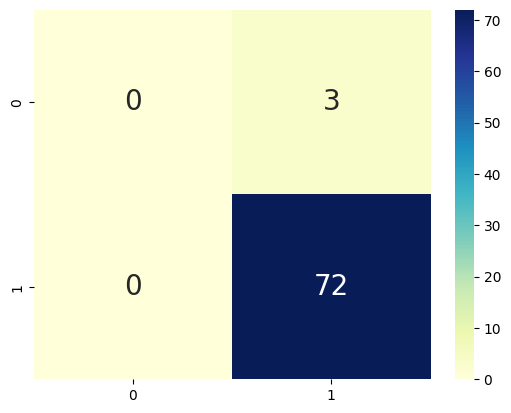

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[1.         0.94666667 0.94594595 0.98648649 0.97297297]


0.9704144144144145

Nuevos datos

In [ ]:
PI22 = datos1[(datos1['CÓDIGO'] == 43390899) & (datos1['PERIODO'] == '2023-02')]

PI22 = PI22.dropna()

X_nuevos = PI22[['PROMEDIO ACUMULADO', 'NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPI22 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPI22)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        84
1  No Aprobado         0


In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos1['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos1['CALIFICACIÓN'].fillna('NS', inplace=True)

datos1['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
datos1.shape

(44575, 13)

##PENSAMIENTO ALGORITMICO

In [ ]:
PA = datos1[(datos1['CÓDIGO'] == 43390801) & (datos1['PERIODO'] != '2023-02')]
PA.shape

(1097, 13)

In [ ]:
PA.isnull().sum()

PLAN 4064                0
PERIODO                  0
CARRERA                  0
CÓDIGO                   0
ASIGNATURA               0
DOCUMENTO ESTUDIANTE     0
NOTAS PRIMER CORTE      25
PROMEDIO PARCIAL         0
DEFINITIVA              84
CALIFICACIÓN             0
ASIGNATURA ANULADA       0
PROMEDIO SEMESTRAL      45
PROMEDIO ACUMULADO      45
dtype: int64

In [ ]:
PA= PA.dropna()
PA.shape

(999, 13)

In [ ]:
PA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 20837 to 41091
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAN 4064             999 non-null    object 
 1   PERIODO               999 non-null    object 
 2   CARRERA               999 non-null    object 
 3   CÓDIGO                999 non-null    int64  
 4   ASIGNATURA            999 non-null    object 
 5   DOCUMENTO ESTUDIANTE  999 non-null    int64  
 6   NOTAS PRIMER CORTE    999 non-null    float64
 7   PROMEDIO PARCIAL      999 non-null    float64
 8   DEFINITIVA            999 non-null    float64
 9   CALIFICACIÓN          999 non-null    int64  
 10  ASIGNATURA ANULADA    999 non-null    object 
 11  PROMEDIO SEMESTRAL    999 non-null    float64
 12  PROMEDIO ACUMULADO    999 non-null    float64
dtypes: float64(5), int64(3), object(5)
memory usage: 109.3+ KB


In [ ]:
X = PA[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = PA['CALIFICACIÓN']

In [ ]:
#scaler = StandardScaler()
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#X_scaled.head()

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(999, 2) (999,)
(799, 2) (799,)
(200, 2) (200,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.91
Precision score: 0.93
Recall score: 0.95
F1 score: 0.94


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 26  11]
 [  8 155]]

Classification Report

              precision    recall  f1-score   support

           0       0.76      0.70      0.73        37
           1       0.93      0.95      0.94       163

    accuracy                           0.91       200
   macro avg       0.85      0.83      0.84       200
weighted avg       0.90      0.91      0.90       200



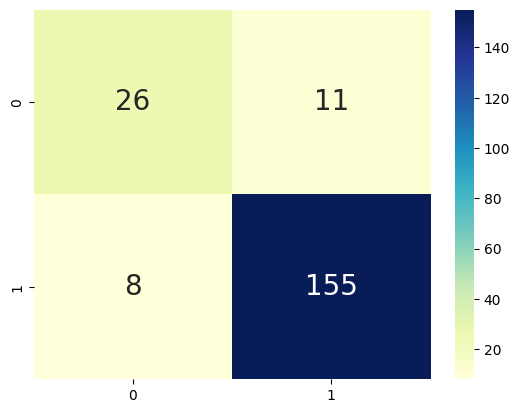

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

Nuevos datos

In [ ]:
PA2 = datos1[(datos1['CÓDIGO'] == 43390801) & (datos1['PERIODO'] == '2023-02')]

PA2 = PA2.dropna()

X_nuevos = PA2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPA2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPA2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        73
1  No Aprobado         5


##LÓGICA MATEMÁTICA

In [ ]:
LM = datos1[(datos1['CÓDIGO'] == 43390842) & (datos1['PERIODO'] != '2023-02')]
LM.shape

(1159, 13)

In [ ]:
LM.isnull().sum()

PLAN 4064                 0
PERIODO                   0
CARRERA                   0
CÓDIGO                    0
ASIGNATURA                0
DOCUMENTO ESTUDIANTE      0
NOTAS PRIMER CORTE       33
PROMEDIO PARCIAL          0
DEFINITIVA              104
CALIFICACIÓN              0
ASIGNATURA ANULADA        0
PROMEDIO SEMESTRAL       56
PROMEDIO ACUMULADO       56
dtype: int64

In [ ]:
LM= LM.dropna()
LM.shape

(1042, 13)

In [ ]:
LM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1042 entries, 20900 to 41732
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PLAN 4064             1042 non-null   object 
 1   PERIODO               1042 non-null   object 
 2   CARRERA               1042 non-null   object 
 3   CÓDIGO                1042 non-null   int64  
 4   ASIGNATURA            1042 non-null   object 
 5   DOCUMENTO ESTUDIANTE  1042 non-null   int64  
 6   NOTAS PRIMER CORTE    1042 non-null   float64
 7   PROMEDIO PARCIAL      1042 non-null   float64
 8   DEFINITIVA            1042 non-null   float64
 9   CALIFICACIÓN          1042 non-null   int64  
 10  ASIGNATURA ANULADA    1042 non-null   object 
 11  PROMEDIO SEMESTRAL    1042 non-null   float64
 12  PROMEDIO ACUMULADO    1042 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 114.0+ KB


In [ ]:
X = LM[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]
y = LM['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1042, 2) (1042,)
(833, 2) (833,)
(209, 2) (209,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


Accuracy score: 0.93
Precision score: 0.94
Recall score: 0.98
F1 score: 0.96


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 21  11]
 [  4 173]]

Classification Report

              precision    recall  f1-score   support

           0       0.84      0.66      0.74        32
           1       0.94      0.98      0.96       177

    accuracy                           0.93       209
   macro avg       0.89      0.82      0.85       209
weighted avg       0.92      0.93      0.92       209



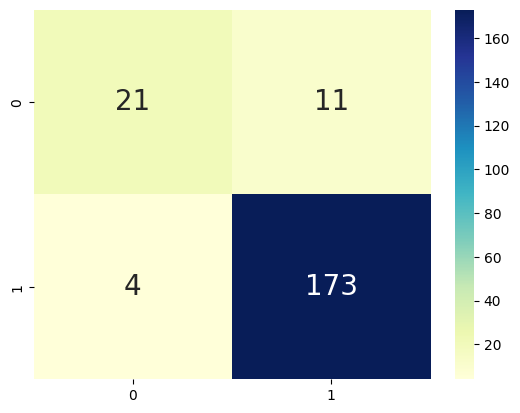

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

Nuevos Datos

In [ ]:
LM2 = datos1[(datos1['CÓDIGO'] == 43390842) & (datos1['PERIODO'] == '2023-02')]

LM2 = LM2.dropna()

X_nuevos = LM2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoLM2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoLM2)

Predicciones para nuevos datos:
 [0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1
 1 1 1]
     Resultado  Cantidad
0     Aprobado        64
1  No Aprobado        13


##PROGRAMACIÓN ORIENTADA A OBJETOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,NaN,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
POO = datos2[(datos1['CÓDIGO'] == 43390843) & (datos2['PERIODO'] != '2023-02')]
POO.shape

(822, 15)

In [ ]:
POO.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    78
NOTA DEFINITIVA PREREQUISITO 2    69
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                41
PROMEDIO PARCIAL                   0
DEFINITIVA                        82
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                12
PROMEDIO ACUMULADO                12
dtype: int64

In [ ]:
POO= POO.dropna()
POO.shape

(654, 15)

In [ ]:
X = POO[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]
y = POO['CALIFICACIÓN']

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(654, 4) (654,)
(523, 4) (523,)
(131, 4) (131,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
# para evaluar el modelo puedo importar las métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))


Accuracy score: 0.89
Precision score: 0.89
Recall score: 0.97
F1 score: 0.93


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[17 12]
 [ 3 99]]

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.59      0.69        29
           1       0.89      0.97      0.93       102

    accuracy                           0.89       131
   macro avg       0.87      0.78      0.81       131
weighted avg       0.88      0.89      0.88       131



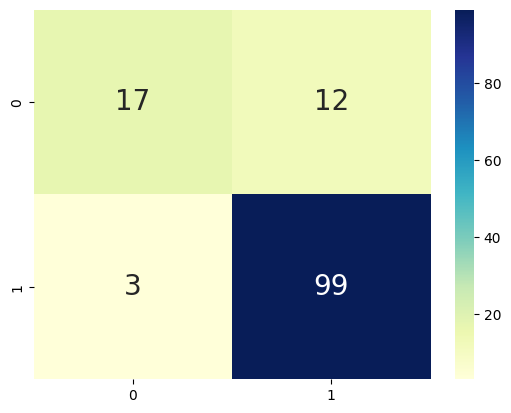

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)


In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[0.84732824 0.81679389 0.76335878 0.86259542 0.86153846]


0.8303229594832647

Nuevos Datos

In [ ]:
POO2 = datos2[(datos2['CÓDIGO'] == 43390843) & (datos2['PERIODO'] == '2023-02')]

POO2 = POO2.dropna()

X_nuevos = POO2[['PROMEDIO ACUMULADO', 'NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1','NOTA DEFINITIVA PREREQUISITO 2']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoPOO2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoPOO2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado       100
1  No Aprobado         5


In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing  import StandardScaler, MinMaxScaler

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


# Para métricas de evaluación
from sklearn.metrics      import r2_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics      import accuracy_score, precision_score, recall_score, f1_score
from sklearn              import metrics

# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.svm          import SVC, SVR, LinearSVC, LinearSVR


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V5.xlsx")
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V5.xlsx")

##BASES DE DATOS

In [ ]:
# Crear DataFrame datos1
datos2 = datos.copy()

#datos1 = datos1[datos1['PLAN 4064'] == 'SI']

datos2['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS' }, inplace=True)

datos2['CALIFICACIÓN'].fillna('NS', inplace=True)

datos2['CALIFICACIÓN'].replace({'NS': 0, 'SP': 1}, inplace=True)

#datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO', 'NOTA DEFINITIVA PREREQUISITO 2',
                   'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS']

datos2 = datos2.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos2.tail(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,DOCUMENTO ESTUDIANTE,NOTAS PRIMER CORTE,PROMEDIO PARCIAL,DEFINITIVA,CALIFICACIÓN,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
44570,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1032419347,4.4,4.20,4.24,1,N,4.32,3.59
44571,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1030690955,4.0,4.25,3.99,1,N,4.16,3.79
44572,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1010203985,4.0,4.00,4.12,1,N,3.77,2.85
44573,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1019081611,4.0,4.10,3.22,1,N,3.91,3.98
44574,NO,2023-02,INGENIERÍA DE SISTEMAS,49875014,ARQUITECTURA ORIENTADA A SERVICIOS,NaN,1014275874,4.5,4.75,4.85,1,N,4.57,3.65


In [ ]:
so = datos2[(datos2['CÓDIGO'] == 43390851) & (datos2['PERIODO'] != '2023-02')]
so.shape

(294, 14)

In [ ]:
so.isnull().sum()

PLAN 4064                          0
PERIODO                            0
CARRERA                            0
CÓDIGO                             0
ASIGNATURA                         0
NOTA DEFINITIVA PREREQUISITO 1    37
DOCUMENTO ESTUDIANTE               0
NOTAS PRIMER CORTE                 8
PROMEDIO PARCIAL                   0
DEFINITIVA                        15
CALIFICACIÓN                       0
ASIGNATURA ANULADA                 0
PROMEDIO SEMESTRAL                14
PROMEDIO ACUMULADO                14
dtype: int64

In [ ]:
so= so.dropna()
so.shape

(238, 14)

In [ ]:
X = so[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]
y = so['CALIFICACIÓN']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(238, 3) (238,)
(190, 3) (190,)
(48, 3) (48,)


In [ ]:
svm_c = SVC()
svm_c.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_SVM = svm_c.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred_SVM)
precision = precision_score(y_test, y_pred_SVM)
recall = recall_score(y_test, y_pred_SVM)
f1 = f1_score(y_test, y_pred_SVM)

# Imprimir las métricas con dos decimales
print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.98
Precision score: 0.98
Recall score: 1.00
F1 score: 0.99


In [ ]:
confusion = confusion_matrix(y_test, y_pred_SVM)
print('Confusion Matrix\n')
print(confusion)

print('\nClassification Report\n')
print(classification_report(y_test, y_pred_SVM))

Confusion Matrix

[[ 2  1]
 [ 0 45]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.98      1.00      0.99        45

    accuracy                           0.98        48
   macro avg       0.99      0.83      0.89        48
weighted avg       0.98      0.98      0.98        48



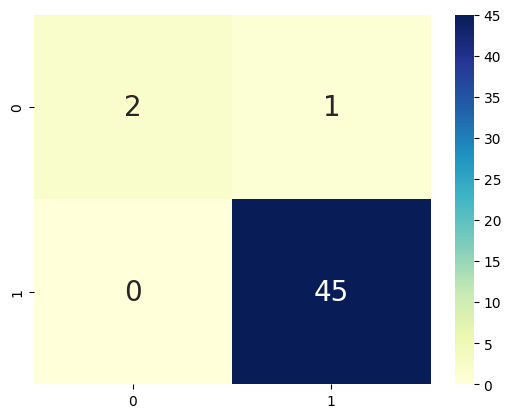

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
MC3 = metrics.confusion_matrix(y_test, y_pred_SVM)
p = sns.heatmap(pd.DataFrame(MC3),
                annot=True,
                annot_kws = {'size':20},            # tamaño de la letra
                cmap="YlGnBu",
                fmt = "g")

In [ ]:
# Validación cruzada k fold
from sklearn.model_selection import KFold
kfold_validacion = KFold(5)

In [ ]:
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(svm_c, X, y, cv = kfold_validacion)
print(resultados)
resultados.mean() # para ver el promedio de los resultados

[1.         0.95833333 0.97916667 0.95744681 0.9787234 ]


0.9747340425531915

##NUEVOS DATOS

In [ ]:
so2 = datos2[(datos2['CÓDIGO'] == 43390851) & (datos2['PERIODO'] == '2023-02')]

so2 = so2.dropna()

X_nuevos = so2[['PROMEDIO ACUMULADO','NOTAS PRIMER CORTE','NOTA DEFINITIVA PREREQUISITO 1']]

# Hacer predicciones en los nuevos datos
y_pred_nuevos = svm_c.predict(X_nuevos)

# Puedes imprimir las predicciones
print("Predicciones para nuevos datos:\n", y_pred_nuevos)

# Crear DataFrame con las predicciones
resultados = pd.DataFrame({'Predicción': y_pred_nuevos})

# Contar los estudiantes que pasan y no pasan
conteo = resultados['Predicción'].value_counts()

# Crear tabla de conteo
tabla_conteoso2 = pd.DataFrame({'Resultado': ['Aprobado', 'No Aprobado'], 'Cantidad': [conteo.get(1, 0), conteo.get(0, 0)]})

print(tabla_conteoso2)

Predicciones para nuevos datos:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
     Resultado  Cantidad
0     Aprobado        65
1  No Aprobado         0


In [ ]:
so2.shape

(65, 14)